In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [24]:
cifar = keras.datasets.cifar10 

In [25]:
(X_train, y_train), (X_test, y_test) = cifar.load_data()

In [26]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [27]:

label = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

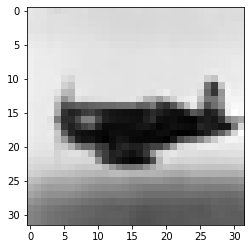

In [28]:
plt.figure()
plt.imshow(X_train[115])

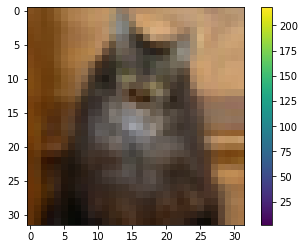

In [29]:
plt.figure()
plt.imshow(X_train[26])
plt.colorbar()

In [30]:
X_train = X_train/255.0
X_test = X_test/255.0

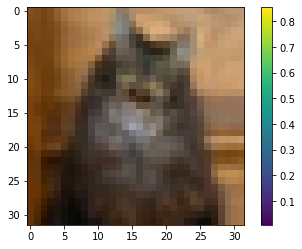

In [31]:
plt.figure()
plt.imshow(X_train[26])
plt.colorbar()

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, Conv2D
from tensorflow.keras.layers import MaxPool2D, Activation, MaxPooling2D

In [33]:
model = Sequential()
model.add(Conv2D(64,activation = 'relu',kernel_size = (3,3 )))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3 )))
model.add(BatchNormalization())
model.add(Flatten(input_shape = (32,32,3)))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))



In [35]:
#compilation of our model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],)

In [36]:
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 57s 2ms/sample - loss: 1.4731 - accuracy: 0.5067 - val_loss: 1.3129 - val_accuracy: 0.5447
Epoch 2/10
35000/35000 [==============================] - 53s 2ms/sample - loss: 0.9685 - accuracy: 0.6621 - val_loss: 1.2357 - val_accuracy: 0.6124
Epoch 3/10
35000/35000 [==============================] - 53s 2ms/sample - loss: 0.7572 - accuracy: 0.7359 - val_loss: 1.2506 - val_accuracy: 0.5909
Epoch 4/10
35000/35000 [==============================] - 52s 1ms/sample - loss: 0.5848 - accuracy: 0.7933 - val_loss: 1.0607 - val_accuracy: 0.6614
Epoch 5/10
35000/35000 [==============================] - 53s 2ms/sample - loss: 0.4326 - accuracy: 0.8495 - val_loss: 1.6402 - val_accuracy: 0.5941
Epoch 6/10
35000/35000 [==============================] - 53s 2ms/sample - loss: 0.3228 - accuracy: 0.8868 - val_loss: 2.1213 - val_accuracy: 0.5489
Epoch 7/10
35000/35000 [==============================] 

In [14]:
#chechking test_loss, test_acc
test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss, test_acc

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

(2.240208701324463, 0.5925)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
y_pred = model.predict_classes(X_test)

In [39]:
accuracy_score(y_test,y_pred)

0.6257

In [40]:
pred = model.predict(X_test)

In [41]:
 pred[5]

array([1.1085514e-08, 8.9843416e-10, 3.1241175e-04, 8.2590741e-05,
       7.7556970e-06, 2.2661160e-03, 9.9732983e-01, 1.1648973e-06,
       3.9815681e-08, 3.6454715e-08], dtype=float32)

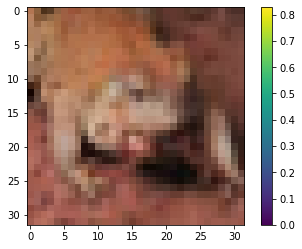

In [42]:
plt.figure()
plt.imshow(X_test[5])
plt.colorbar()

In [43]:
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation', 'accuracy'], loc = 'lower right')
    plt.show()

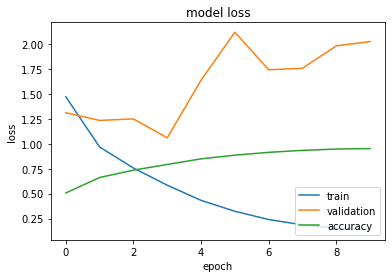

In [44]:
plotloss(history)

[1.4778210102717082,
 1.183109639040629,
 1.473300318400065,
 1.3703914442062377,
 1.3741146575927734,
 1.5564222091039022,
 2.0442938990275064,
 1.9496254594802855,
 2.261017579650879,
 2.0271355943044025]